## Boosting

Meta-algoritmo de conjunto para reduzir principalmente o viés e também a variação no aprendizado supervisionado, e uma família de algoritmos de aprendizado de máquina que convertem alunos fracos em alunos fortes.

### Gradient-boosted decision trees

Gradient-boosted para classificação. O Gradient Boosting Classifier é um conjunto aditivo de um modelo base cujo erro é corrigido em iterações (ou estágios) sucessivas pela adição de Árvores de Regressão que corrigem os resíduos (o erro do estágio anterior).oosting é um método de conversão de aprendizes fracos em aprendizes fortes. Em Boosting , cada nova árvore se encaixa em uma versão modificada do conjunto de dados original.


Diferentemente do método de floresta aleatória que constrói e combina uma floresta de árvores aleatoriamente diferentes em paralelo, a ideia principal das árvores de decisão com gradiente (gradient boosted decision trees) é que elas construam uma série de árvores. Onde cada árvore é treinada, para tentar corrigir os erros da árvore anterior na série.
Normalmente, os conjuntos de árvores com gradiente (gradient boosted decision trees) aumentado usam muitas árvores rasas conhecidas no aprendizado de máquina como aprendizes fracos. Construído de maneira não aleatória, para criar um modelo que cometa menos e menos erros à medida que mais árvores são adicionadas.

Depois que o modelo é construído, fazer previsões com modelos de árvore com gradiente é rápido e não usa muita memória.

Como florestas aleatórias, o número de estimadores no conjunto de árvores impulsionadas por gradiente é um parâmetro importante no controle da complexidade do modelo.

Um novo parâmetro que não ocorre com a floresta aleatória é algo chamado taxa de aprendizado. A taxa de aprendizado controla como o gradiente aumenta os algoritmos das árvores, constrói uma série de árvores coletivas.

Quando a taxa de aprendizado (learning rate) é alta, cada árvore sucessiva coloca forte ênfase na correção dos erros de seu antecessor.

E, portanto, pode resultar em uma árvore individual mais complexa e, em geral, essas são modelos mais complexos. Com configurações menores da taxa de aprendizado, há menos ênfase na correção completa dos erros da etapa anterior, o que tende a levar a árvores mais simples a cada etapa.

A partir do módulo sklearn.ensemble, importamos a classe GradientBoostingClassifier.

Por padrão, o parâmetro de taxa de aprendizado (learning rate) é definido como 0,1. 

O parâmetro n_estimators que fornece o número de árvores a usar é definido como 100. 

A profundidade máxima (max depth) é definida como 3. 



In [12]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import os 
os.chdir(r'C:\Users\gizel\Documents\PUCMG\PUC_MG_Disciplinas\PUC_MG_Disciplinas\04 - Machine Learning\Unidade 3 - Aprendizado Supervisionado Classificação e Regressão/dataset')


In [13]:
sonar = pd.read_excel('sonar.xlsx')

print(sonar.shape)
print(sonar.keys())
print(sonar['Classe'].unique())

(208, 61)
Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'Atributo_59', 'Atributo

In [16]:
# Pacote de treinamento: Pegando todas as colunas exceto a última coluna que possui os labels: 'Classe'

X_train_ = sonar.iloc[:,0:(sonar.shape[1] - 1)]


# LabelEnconder transforma apenas a última coluna "Classe:['Rocha' 'Mina'] string em classe binária 
le = LabelEncoder()

y_train_ = le.fit_transform(sonar.iloc[:,(sonar.shape[1]-1)])



X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, random_state = 0)







In [22]:
clf_gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)


print('GradientBoostingClassifier, Sonar ')
print('Acurácia no pacote de treinamento: {:.2f}'
     .format(clf_gbc.score(X_train, y_train)))
print('Acurácia no pacote de teste: {:.2f}'
     .format(clf_gbc.score(X_test, y_test)))

GradientBoostingClassifier, Sonar 
Acurácia no pacote de treinamento: 1.00
Acurácia no pacote de teste: 0.87


###### Comparando a acurácia acima com a acurácia do algoritmo Random Forrests que fizemos na aula anterior, notamos uma grande melhora com o uso de GradientBoostingClassifier. 

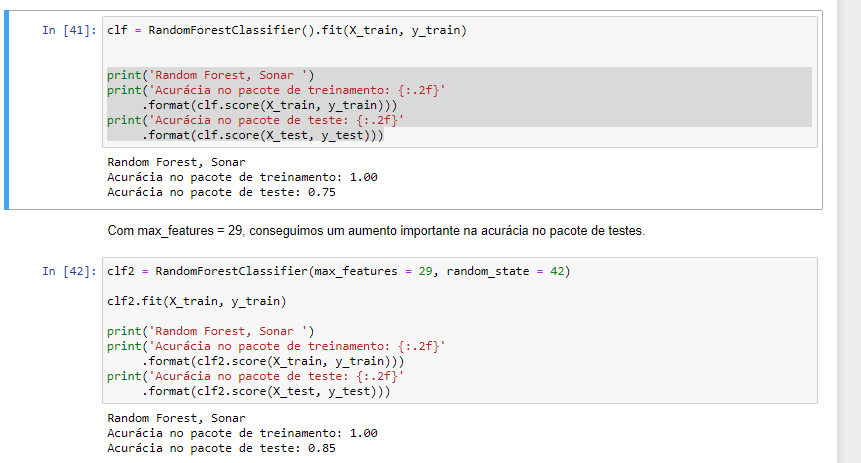

### ADA Boosting

Pode usar qualquer classificado fraco. 
É rápido, pois faz apenas uma passada na base a cada iteração. 
Mudança de mentalidade: O objetivo é encontrar um classificador que seja marginalmente melhor que adivinhação.

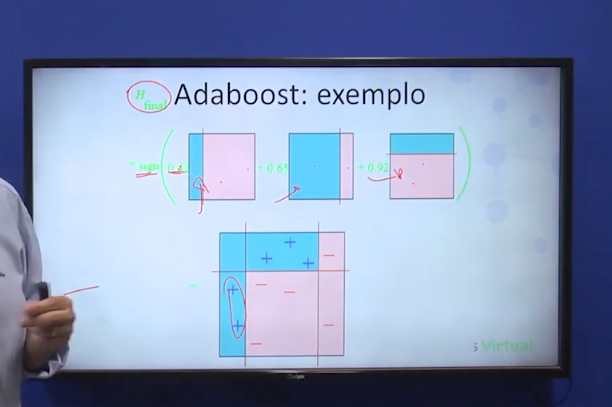

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


clf_ada = AdaBoostClassifier(random_state=0).fit(X_train, y_train)



print('AdaBoostClassifier, Sonar ')
print('Acurácia no pacote de treinamento: {:.2f}'
     .format(clf_ada.score(X_train, y_train)))
print('Acurácia no pacote de teste: {:.2f}'
     .format(clf_ada.score(X_test, y_test)))


AdaBoostClassifier, Sonar 
Acurácia no pacote de treinamento: 1.00
Acurácia no pacote de teste: 0.87
